C:\Users\flare\AppData\Local\Temp\ipykernel_18804\3992458718.py:52: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  overlap = np.trapz(np.minimum(f0, f1), x_grid)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core

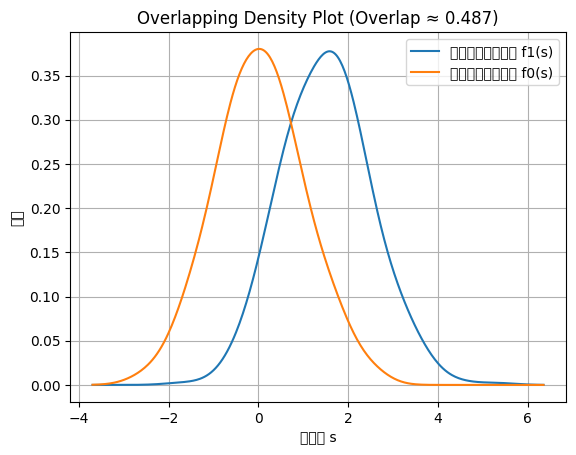

C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

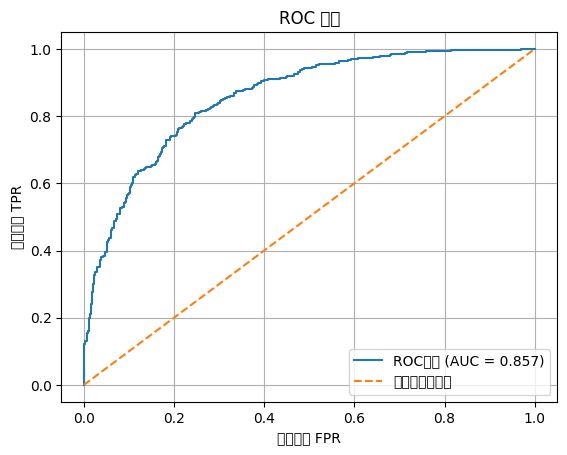

Overlap (∫ min(f0,f1) ds) ≈ 0.487
AUC ≈ 0.857


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ================================
# 1. 擬似データの生成
# ================================
np.random.seed(42)

n_pos = 500   # 陽性サンプル数
n_neg = 500   # 陰性サンプル数

# 陽性は平均 1.5、陰性は平均 0.0 の正規分布からスコアを生成
pos_scores = np.random.normal(loc=1.5, scale=1.0, size=n_pos)
neg_scores = np.random.normal(loc=0.0, scale=1.0, size=n_neg)

scores = np.concatenate([pos_scores, neg_scores])
y_true = np.concatenate([np.ones(n_pos), np.zeros(n_neg)])  # 1=陽性, 0=陰性

# ================================
# 2. KDE による Overlapping Density Plot
# ================================

def kde_gaussian(sample, grid, h):
    """
    単純な1次元ガウスカーネルによるKDE
    sample: データ (N,)
    grid:   密度を評価する点 (M,)
    h:      バンド幅
    """
    sample = sample.reshape(1, -1)   # (1, N)
    grid   = grid.reshape(-1, 1)     # (M, 1)
    u = (grid - sample) / h
    # ガウスカーネル
    k = np.exp(-0.5 * u**2) / np.sqrt(2.0 * np.pi)
    # 平均を取って密度化
    density = k.mean(axis=1) / h
    return density

# グリッドを決める（スコアの範囲を少し広めに）
x_min = scores.min() - 1.0
x_max = scores.max() + 1.0
x_grid = np.linspace(x_min, x_max, 400)

# バンド幅（適当な値。気になる場合はいろいろ試してOK）
h = 0.4

f1 = kde_gaussian(pos_scores, x_grid, h)  # 陽性の密度
f0 = kde_gaussian(neg_scores, x_grid, h)  # 陰性の密度

# Overlap = ∫ min(f0, f1) dx を数値積分で求める
overlap = np.trapz(np.minimum(f0, f1), x_grid)

# ================================
# 3. ROC曲線と AUC
# ================================
fpr, tpr, thresholds = roc_curve(y_true, scores)
auc = roc_auc_score(y_true, scores)

# ================================
# 4. プロット
# ================================

# --- Overlapping Density Plot ---
plt.figure()
plt.plot(x_grid, f1, label="陽性クラスの密度 f1(s)")
plt.plot(x_grid, f0, label="陰性クラスの密度 f0(s)")
plt.title(f"Overlapping Density Plot (Overlap ≈ {overlap:.3f})")
plt.xlabel("スコア s")
plt.ylabel("密度")
plt.legend()
plt.grid(True)

# --- ROC 曲線 ---
plt.figure()
plt.plot(fpr, tpr, label=f"ROC曲線 (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="ランダム分類器")
plt.xlabel("偽陽性率 FPR")
plt.ylabel("真陽性率 TPR")
plt.title("ROC 曲線")
plt.legend()
plt.grid(True)

plt.show()

print(f"Overlap (∫ min(f0,f1) ds) ≈ {overlap:.3f}")
print(f"AUC ≈ {auc:.3f}")
